In [1]:
import numpy as np
from numpy import linalg as linalg
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def gram_schmid(b):
    b_=np.zeros(b.shape)
    m=np.zeros(b.shape)
    b_[0]=b[0]
    for i in range(1,b.shape[1]):
        v=b[i]
        for j in range(i-1,-1,-1):
            m[i][j]=np.dot(b[i],b_[j])/np.dot(b_[j],b_[j])
            v=v-m[i][j]*b_[j]
        b_[i]=v
    return b_.astype("int"),m


def draw_3d(a,b,c,a_,b_,c_):
    points_count=3
    points=[a,b,c]
    for x in range(-points_count//2+1,points_count//2+1):
        for y in range(-points_count//2+1,points_count//2+1):
            for z in range(-points_count//2+1,points_count//2+1):
                points.append(a*x+b*y+c*z)
    points=np.array(points)
    
    
    points_=[a_,b_,c_]
    for x in range(-points_count//2+1,points_count//2+1):
        for y in range(-points_count//2+1,points_count//2+1):
            for z in range(-points_count//2+1,points_count//2+1):
                points_.append(a_*x+b_*y+c_*z)
    points_=np.array(points_)
    
    
    fig = plt.figure(figsize=(20,20))
    
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(points[:,0],points[:,1],points[:,2],c="r")
    ax.scatter(points_[:,0],points_[:,1],points_[:,2],c="g")
    ax.scatter([0],[0],[0])
    
    ax.plot([0,a[0]],[0,a[1]],[0,a[2]],color="r",label ="before")
    ax.plot([0,b[0]],[0,b[1]],[0,b[2]],color="r")
    ax.plot([0,c[0]],[0,c[1]],[0,c[2]],color="r")
    ax.plot([0,a_[0]],[0,a_[1]],[0,a_[2]],color="g",label ="after")
    ax.plot([0,b_[0]],[0,b_[1]],[0,b_[2]],color="g")
    ax.plot([0,c_[0]],[0,c_[1]],[0,c_[2]],color="g")
    
    ax.view_init(30, 15)
    
    ax.legend()
    ax.grid()
    plt.show()
    return points

In [3]:
a=np.array([[1,1,1],[-1,0,2],[3,5,6]])
a

array([[ 1,  1,  1],
       [-1,  0,  2],
       [ 3,  5,  6]])

b_ [[ 1  1  1]
 [-1  0  1]
 [ 0  0  0]] 

m [[0.         0.         0.        ]
 [0.33333333 0.         0.        ]
 [4.66666667 0.92857143 0.        ]]


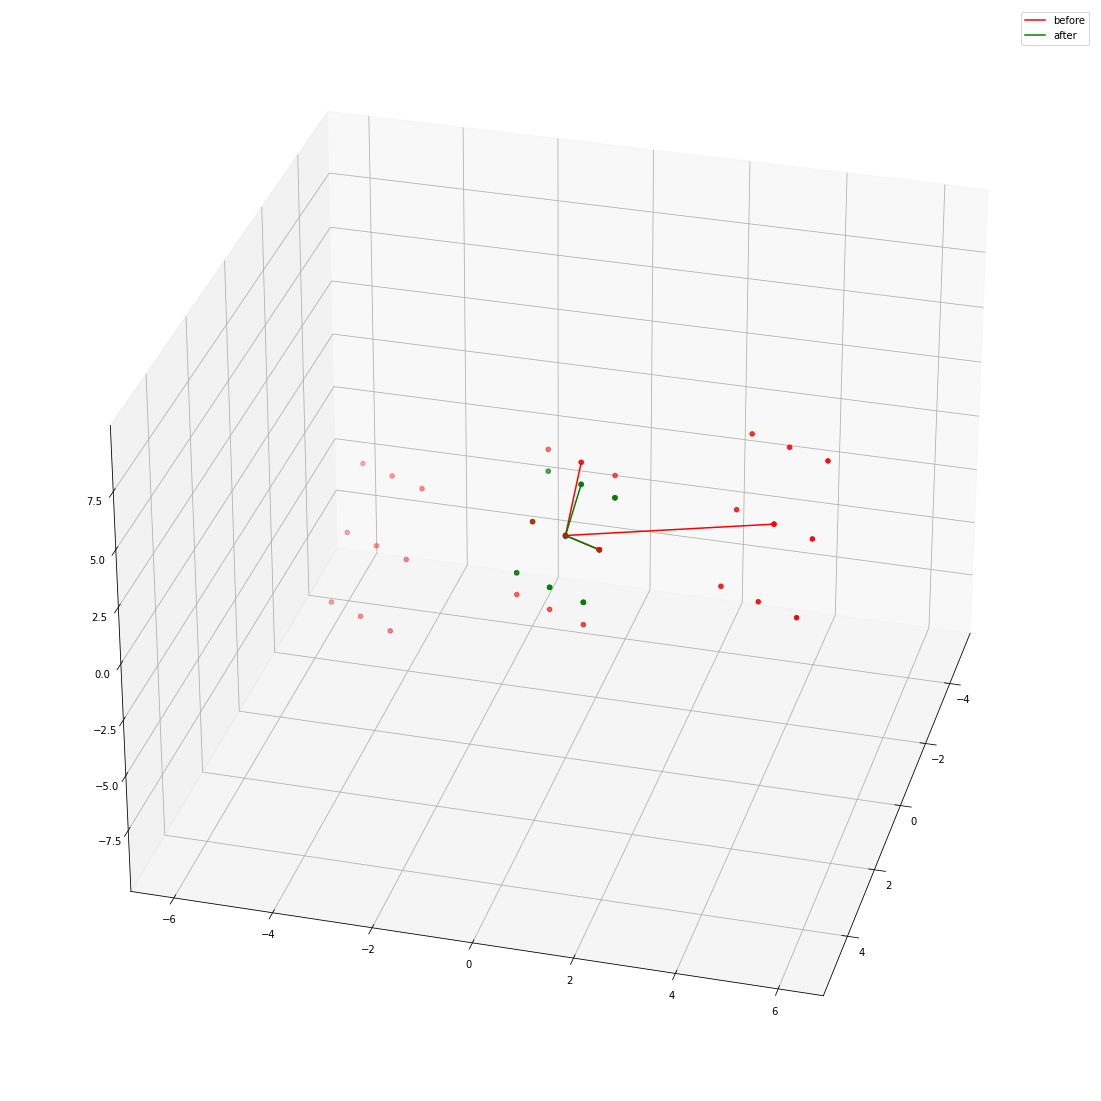

In [4]:
b_,m=gram_schmid(a)
print("b_",b_,"\n\nm",m)
points=draw_3d(*a,*b_)

In [5]:
norma = lambda x: np.power(math.sqrt(np.array([i ** 2 for i in x]).sum()),2)
def LLL(b, delta=0.75):
    b_, m = gram_schmid(b)
    B = np.array([norma(i) for i in b_])
    q = np.zeros(b.shape[1])
    n = b.shape[1]-1
    k = 1
    while k <= n:
        for j in range(k-1,-1,-1):
            q[j] = round(m[k][j])
            b[k] = b[k] - q[j] * b[j]
            for i in range(k-1,-1,-1):
                m[k][i] = np.inner(b[k], b_[i]) / np.inner(b_[i], b_[i])
        if B[k] >= (delta - np.power(m[k][k - 1], 2)) * B[k - 1]:
            k += 1
        else:
            b[k], b[k - 1] = b[k - 1].copy(), b[k].copy()
            tmp_b,tmp_m=gram_schmid(b)
            b_[k],b_[k - 1]=tmp_b[k],tmp_b[k-1]
            m[k],m[k - 1]=tmp_m[k],tmp_m[k-1]
            B = np.array([norma(i) for i in b_])
            k = max(1, k - 1)

    return b,m

def check_lenght(m):
    for i in range(m.shape[0]):
        for j in range(i):
            if abs(m[i][j])>0.5:
                return False
    return True

def check_lovash(m,b_,delta=0.75):
    for i in range(1,m.shape[0]):
        if (delta-m[i][i-1]**2)*norma(b_[i-1])>norma(b_[i]):
            return False
    return True

## Примеры
#### 1

a
 [[ 1  0  0]
 [ 4  2 15]
 [ 0  0  3]] 

b
 [[1 0 0]
 [0 2 0]
 [0 0 3]]
Условие длины: True, условие Ловаша: True


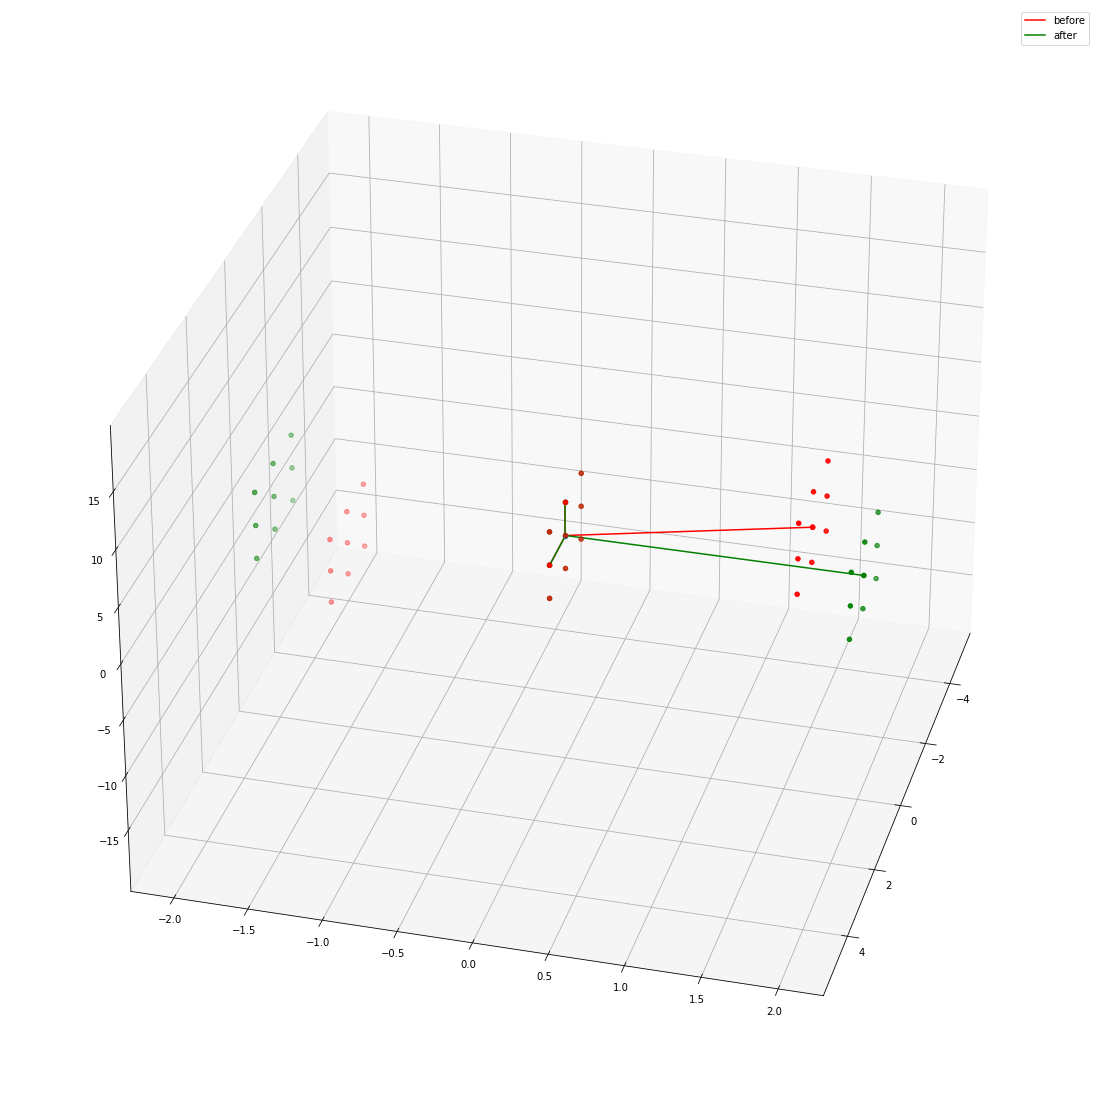

array([[  1,   0,   0],
       [  4,   2,  15],
       [  0,   0,   3],
       [ -5,  -2, -18],
       [ -5,  -2, -15],
       [ -5,  -2, -12],
       [ -1,   0,  -3],
       [ -1,   0,   0],
       [ -1,   0,   3],
       [  3,   2,  12],
       [  3,   2,  15],
       [  3,   2,  18],
       [ -4,  -2, -18],
       [ -4,  -2, -15],
       [ -4,  -2, -12],
       [  0,   0,  -3],
       [  0,   0,   0],
       [  0,   0,   3],
       [  4,   2,  12],
       [  4,   2,  15],
       [  4,   2,  18],
       [ -3,  -2, -18],
       [ -3,  -2, -15],
       [ -3,  -2, -12],
       [  1,   0,  -3],
       [  1,   0,   0],
       [  1,   0,   3],
       [  5,   2,  12],
       [  5,   2,  15],
       [  5,   2,  18]])

In [8]:
a=np.array([[1, 0, 0],[4, 2, 15],[0, 0, 3]])
b,m=LLL(a.copy())
print("a\n",a,"\n\nb\n",b)
b_,_=gram_schmid(b.copy())
print(f"Условие длины: {check_lenght(m)}, условие Ловаша: {check_lovash(m,b_)}")
draw_3d(*a,*b)

#### 2

a [[ 1  1  1]
 [-1  0  2]
 [ 3  5  6]] 

b [[ 0  1  0]
 [ 1  0  1]
 [-1  0  2]]
Условие длины: True, условие Ловаша: True


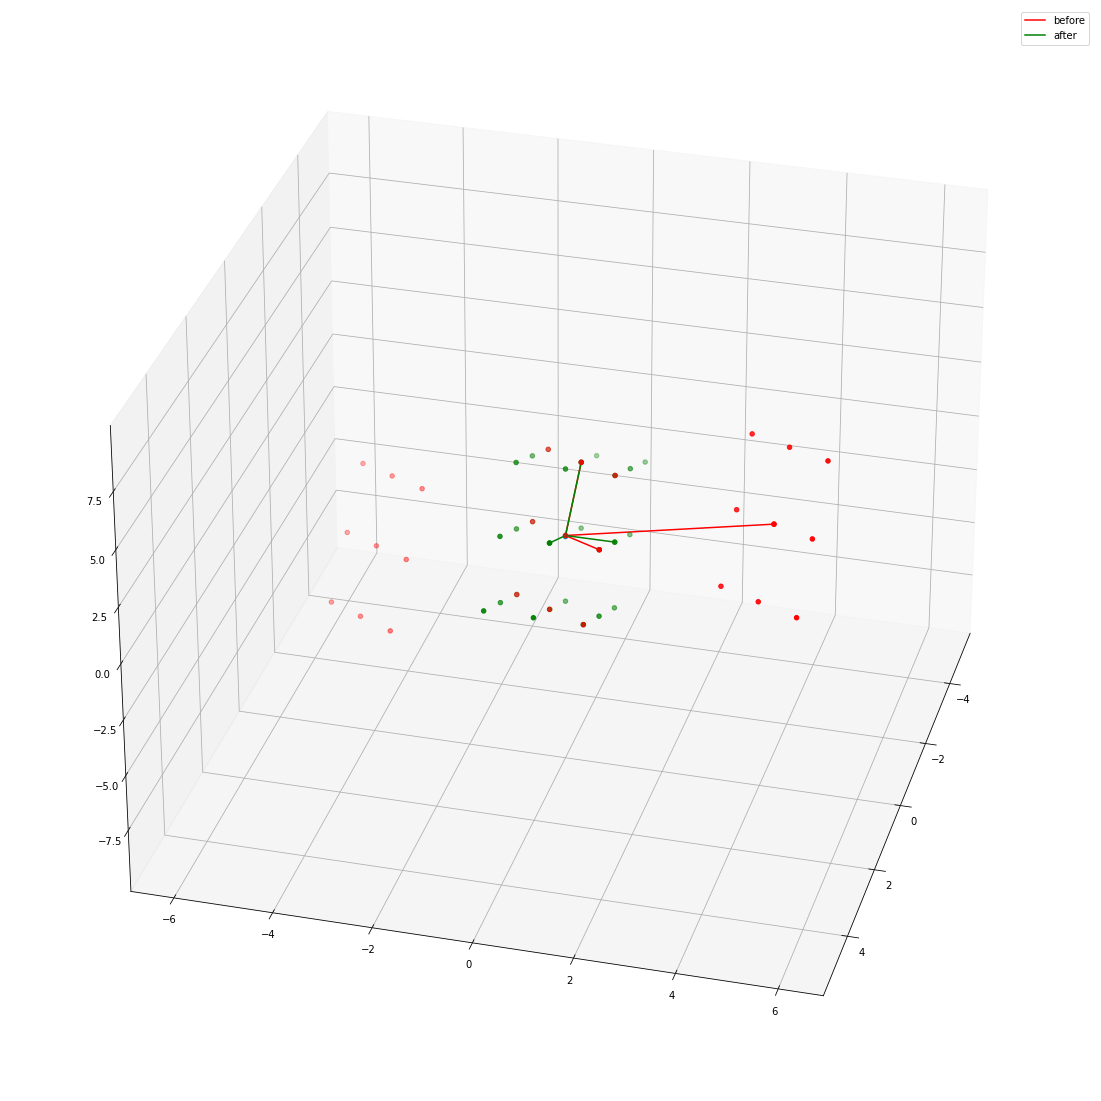

array([[ 1,  1,  1],
       [-1,  0,  2],
       [ 3,  5,  6],
       [-3, -6, -9],
       [ 0, -1, -3],
       [ 3,  4,  3],
       [-4, -6, -7],
       [-1, -1, -1],
       [ 2,  4,  5],
       [-5, -6, -5],
       [-2, -1,  1],
       [ 1,  4,  7],
       [-2, -5, -8],
       [ 1,  0, -2],
       [ 4,  5,  4],
       [-3, -5, -6],
       [ 0,  0,  0],
       [ 3,  5,  6],
       [-4, -5, -4],
       [-1,  0,  2],
       [ 2,  5,  8],
       [-1, -4, -7],
       [ 2,  1, -1],
       [ 5,  6,  5],
       [-2, -4, -5],
       [ 1,  1,  1],
       [ 4,  6,  7],
       [-3, -4, -3],
       [ 0,  1,  3],
       [ 3,  6,  9]])

In [9]:
a=np.array([[1,1,1],[-1,0,2],[3,5,6]])
b,m=LLL(a.copy())
print("a",a,"\n\nb",b)
b_,_=gram_schmid(b.copy())
print(f"Условие длины: {check_lenght(m)}, условие Ловаша: {check_lovash(m,b_)}")
draw_3d(*a,*b)